# Intro to Data Science - Project

## Olympic Games Analysis

### Libraries that will be used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import KMeans

sns.set_palette("twilight")
warnings.filterwarnings("ignore")

### Importing data

## Activity 1

In [2]:
PATH = "./data/athlete_events.csv" 

# The dataset can be found in: 
# https://github.com/caiochacon/projeto_final_ICD/blob/main/datasets/new_olympic/archive.zip?raw=true

df = pd.read_csv(PATH)  
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
PATH = "./data/athlete_events.csv" 

# The dataset can be found in: 
# https://github.com/caiochacon/projeto_final_ICD/blob/main/datasets/new_olympic/archive.zip?raw=true

df = pd.read_csv(PATH)  
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Measures of centrality and dispersion of height, weight and age of athletes

In [3]:
#chosing the columns to be used
physiological_cols = ["Age", "Height", "Weight"]

df[physiological_cols].describe().iloc[1:,]

,Age,Height,Weight
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


### Boxplot of height, weight and age

In [4]:
def customBoxplot(col):
    """
        Function to create a boxplot more quickly for the activity 1 
    """
    
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x="Sex", y=col, width=0.6)
    plt.xlabel("Sex",fontsize=12)
    plt.ylabel(f"{col}\n",fontsize=12)
    plt.title(f"Boxplot of Sex per {col}\n", fontsize=15)
    plt.show()

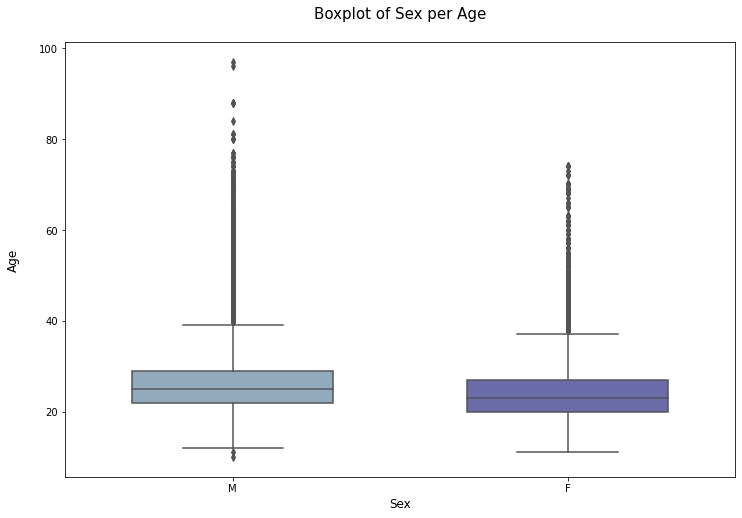

In [5]:
customBoxplot(physiological_cols[0])

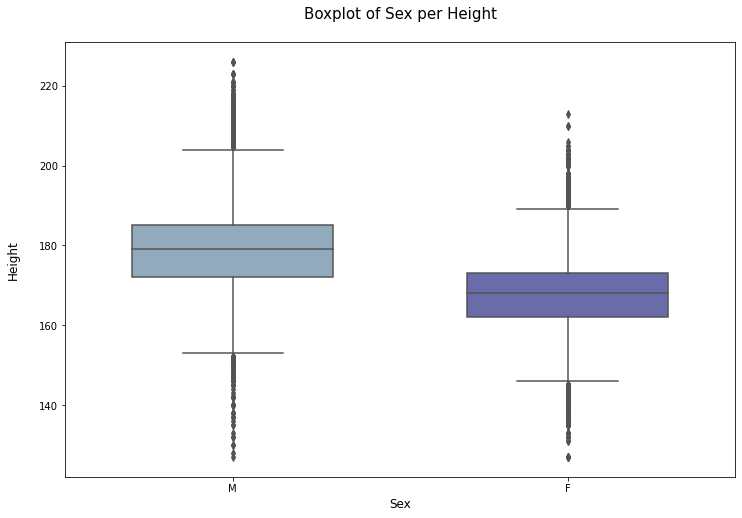

In [6]:
customBoxplot(physiological_cols[1])

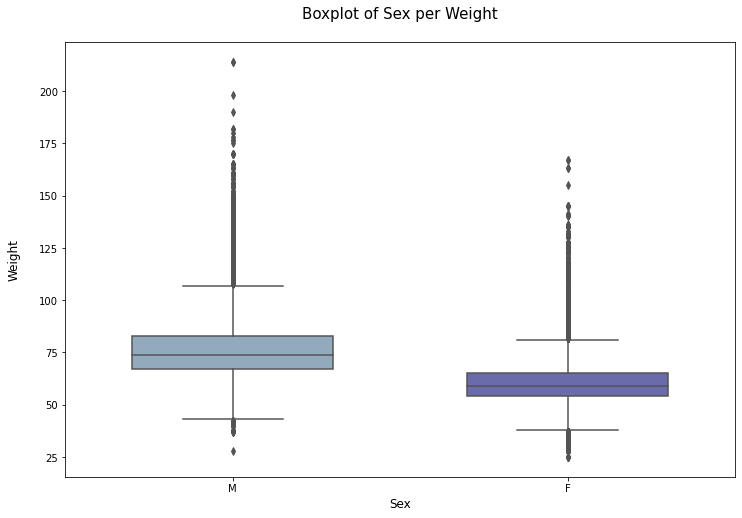

In [7]:
customBoxplot(physiological_cols[2])

## Activity 2

### Barplot: Top 10 countries with more gold medals

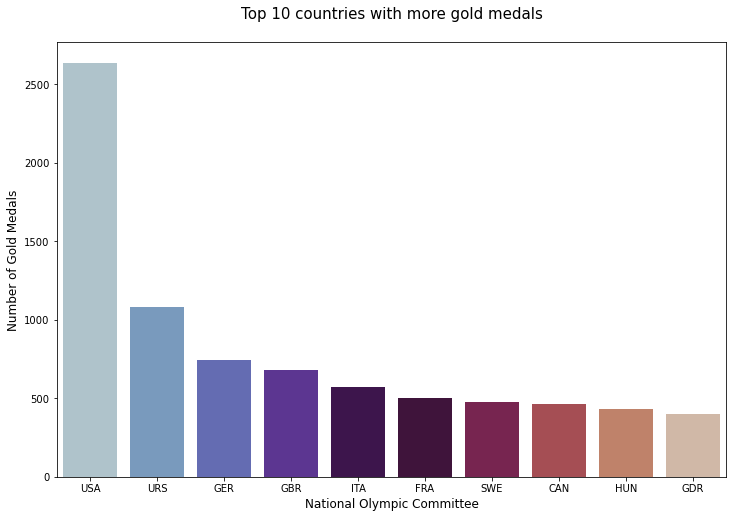

In [8]:
# Tacking just the gold medalists and turn "Gold" into 1 (for counting)
gold = df.query("Medal == 'Gold'").replace("Gold", 1)
# Tacking the top 10 countries
top10_gold = gold.groupby("NOC")["Medal"].sum().sort_values(ascending=False).head(10) 


plt.figure(figsize=(12,8))
sns.barplot(x=top10_gold.index, y=top10_gold.values, saturation=0.90, palette="twilight")
plt.xlabel("National Olympic Committee", fontsize=12)
plt.ylabel("Number of Gold Medals", fontsize=12)
plt.title("Top 10 countries with more gold medals\n", fontsize=15)
plt.show()

### Histogram of Height and Weight

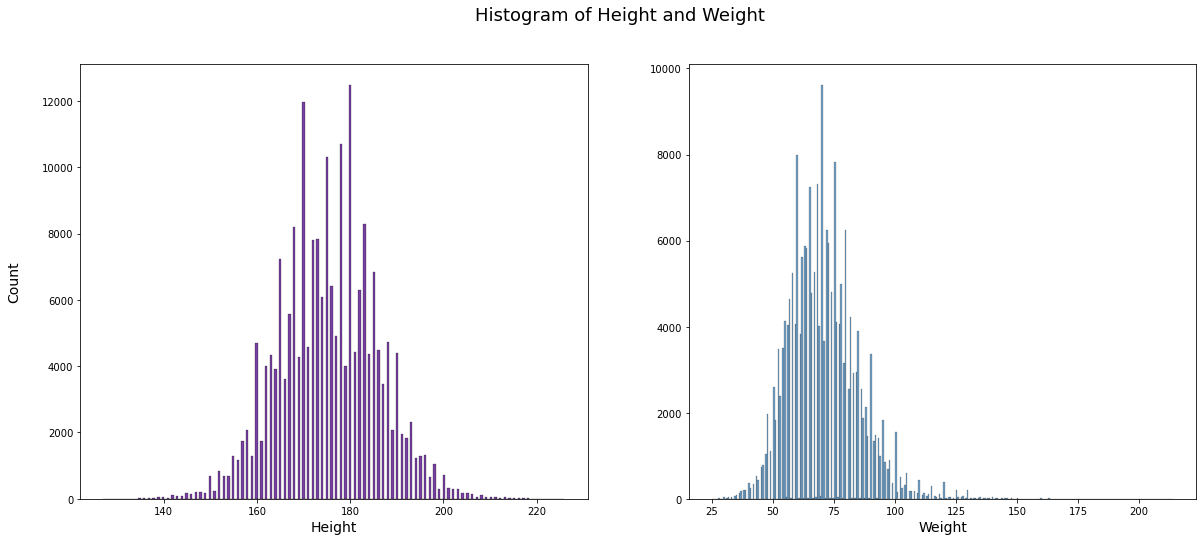

In [9]:
plt.figure(figsize=(20,8))
plt.suptitle("Histogram of Height and Weight", fontsize=18)

plt.subplot(1,2,1)
sns.histplot(data=df, x="Height", color="indigo")
plt.xlabel("Height", fontsize=14)
plt.ylabel("Count\n", fontsize=14)

plt.subplot(1,2,2)
sns.histplot(data=df, x="Weight", color="steelblue")
plt.xlabel("Weight", fontsize=14)
plt.ylabel("")

plt.show()

### Lineplot: Brazil performance in the Summer Olympics

In [10]:
# Tacking just the Brazilian performance
br = df.query("NOC == 'BRA' & Season == 'Summer'")
# Binary: Medal = 1 | No Medal = 0
br["BinMedal"] = (br["Medal"].isna() == False)
# Grouping for year
brMedals = br.groupby("Year")["BinMedal"].sum()

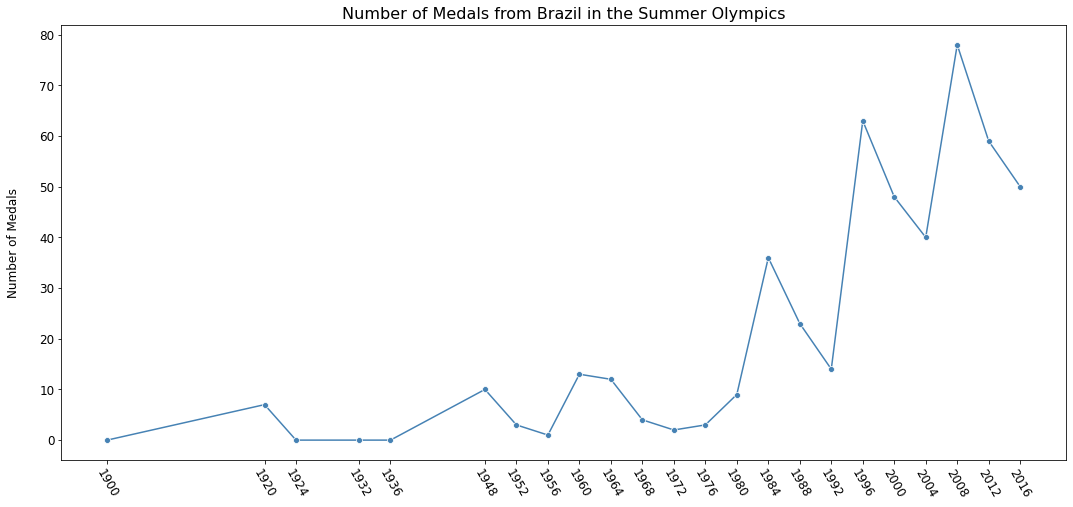

In [11]:
plt.figure(figsize=(18,8))
sns.lineplot(x=brMedals.index, y=brMedals.values, marker="o", color="steelblue")
plt.xticks(brMedals.index, rotation=300, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("Number of Medals\n", fontsize=12)
plt.title("Number of Medals from Brazil in the Summer Olympics", fontsize=16)
plt.show()

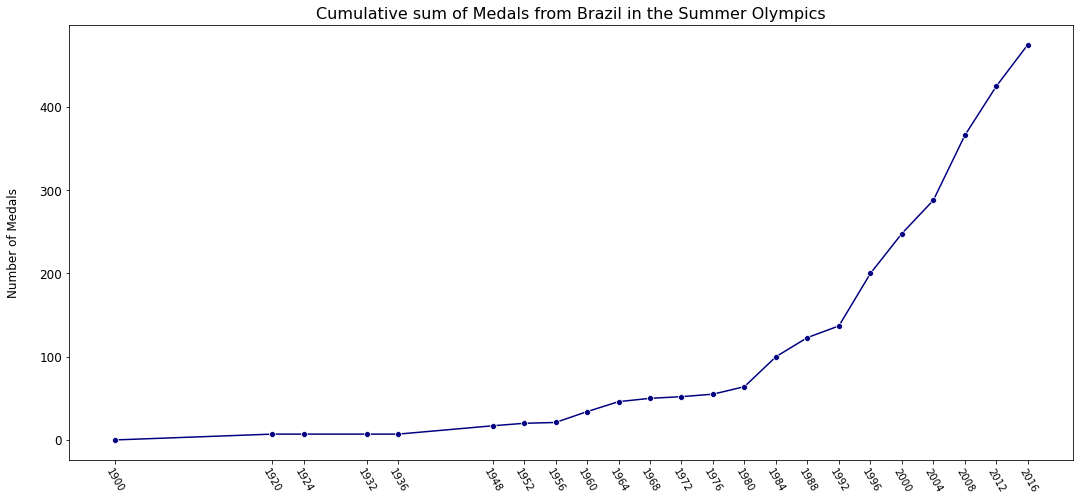

In [12]:
plt.figure(figsize=(18,8))
sns.lineplot(x=brMedals.cumsum().index, y=brMedals.cumsum().values, marker="o", color="navy")
plt.xticks(brMedals.index, rotation=300)
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("Number of Medals\n", fontsize=12)
plt.title("Cumulative sum of Medals from Brazil in the Summer Olympics", fontsize=16)
plt.show()

## Assignment 3

### Checking for missing values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Transform missing values of each athlete into mean value of said athlete's sport.
   We believe this is a good choice because it preserves the main characteristics of the sport ie. basketball athletes are generally taller than average etc

In [14]:
# Creates the {sport: mean_age_by_sport} dict
mean_age_by_sport = df.groupby("Sport").mean().reset_index().drop(columns = ["Height","Year","ID","Weight"])
mean_age_dict = dict(zip(mean_age_by_sport["Sport"],mean_age_by_sport["Age"]))

# Transforms null values into mean age by sport
null_ages = df[pd.isnull(df["Age"])]
null_ages["Age"] = null_ages["Sport"].map(mean_age_dict)
df["Age"].fillna(null_ages["Age"],inplace=True)
df.info() # 9474 values transformed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [15]:
mean_height_by_sport = df.groupby("Sport").mean().reset_index().drop(columns = ["Age","Year","ID","Weight"])
mean_height_dict = dict(zip(mean_height_by_sport["Sport"],mean_height_by_sport["Height"]))

null_heights = df[pd.isnull(df["Height"])]
null_heights["Height"] = null_heights["Sport"].map(mean_height_dict)
df["Height"].fillna(null_heights["Height"],inplace=True)
df.info() # 60072 values transformed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271017 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [16]:
mean_weight_by_sport = df.groupby("Sport").mean().reset_index().drop(columns = ["Age","Year","ID","Height"])
mean_weight_dict = dict(zip(mean_weight_by_sport["Sport"],mean_weight_by_sport["Weight"]))

null_weights = df[pd.isnull(df["Weight"])]
null_weights["Weight"] = null_weights["Sport"].map(mean_weight_dict)
df["Weight"].fillna(null_weights["Weight"],inplace=True)
df.info() # 62658 values transformed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271017 non-null  float64
 5   Weight  270899 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Transform NaN medal values into "No Medal".

In [17]:
df["Medal"].fillna("No medal",inplace=True)

### Drop remaining NaN values, since no more useful transformations can be performed on them.

In [18]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270899 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270899 non-null  int64  
 1   Name    270899 non-null  object 
 2   Sex     270899 non-null  object 
 3   Age     270899 non-null  float64
 4   Height  270899 non-null  float64
 5   Weight  270899 non-null  float64
 6   Team    270899 non-null  object 
 7   NOC     270899 non-null  object 
 8   Games   270899 non-null  object 
 9   Year    270899 non-null  int64  
 10  Season  270899 non-null  object 
 11  City    270899 non-null  object 
 12  Sport   270899 non-null  object 
 13  Event   270899 non-null  object 
 14  Medal   270899 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 33.1+ MB


### Transforming Age, Height and Weight into integers

In [19]:
df = df.astype({"Age":int,"Height":int,"Weight":int})
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,3,Gunnar Nielsen Aaby,M,24,175,70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,4,Edgar Lindenau Aabye,M,34,182,95,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270899 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      270899 non-null  int64 
 1   Name    270899 non-null  object
 2   Sex     270899 non-null  object
 3   Age     270899 non-null  int32 
 4   Height  270899 non-null  int32 
 5   Weight  270899 non-null  int32 
 6   Team    270899 non-null  object
 7   NOC     270899 non-null  object
 8   Games   270899 non-null  object
 9   Year    270899 non-null  int64 
 10  Season  270899 non-null  object
 11  City    270899 non-null  object
 12  Sport   270899 non-null  object
 13  Event   270899 non-null  object
 14  Medal   270899 non-null  object
dtypes: int32(3), int64(2), object(10)
memory usage: 30.0+ MB


### Perguntas

1-) Quais colunas precisaram de limpeza ou transformação? As colunas: Age, Height, Weight e Medal

2-) Que métodos foram utilizados nas colunas citadas na pergunta anterior? Substituição de valores nulos por média/valor específico, descarte de valores nulos e mudança de tipo

## Activity 4

In [47]:
# Transform Sex column in numerical data
df['NSex'] = df['Sex'].replace({'M': 1, 'F': 2})
# Male = 1
# Female = 2

In [67]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,1,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,2,A Lamusi,1,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,3,Gunnar Nielsen Aaby,1,24,175,70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,4,Edgar Lindenau Aabye,1,34,182,95,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,2,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal


In [68]:
# function to plot grouped data

def grouped(data, col1, col2, num):
    # co1 and col2 are names of columns
    # num is the number of clusters
    
    kmeans = KMeans(n_clusters=num)
    kmeans.fit(data[[col1, col2]])
    sns.scatterplot(data=data[[col1, col2]], x=col1, y=col2, hue=kmeans.labels_)

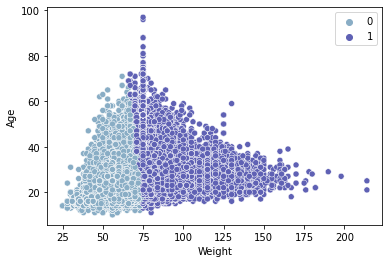

In [69]:
grouped(df, 'Weight', 'Age', 2)

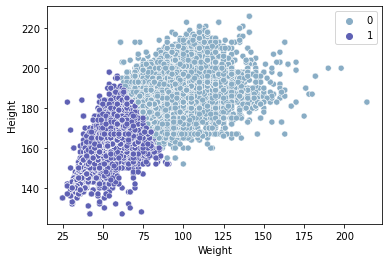

In [70]:
grouped(df, 'Weight', 'Height', 2)

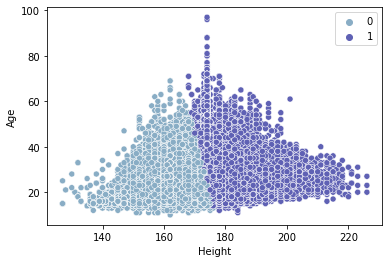

In [71]:
grouped(df, 'Height', 'Age', 2)

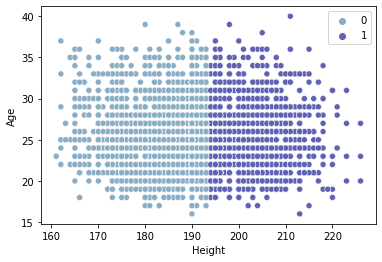

In [74]:
basketball = df[df['Sport'] == 'Basketball']
grouped(basketball, 'Height', 'Age', 2)

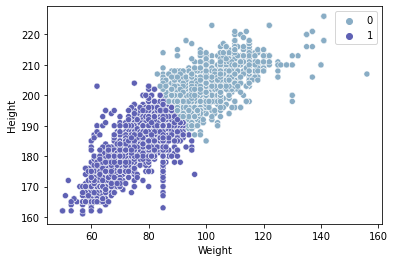

In [75]:
grouped(basketball, 'Weight', 'Height', 2)

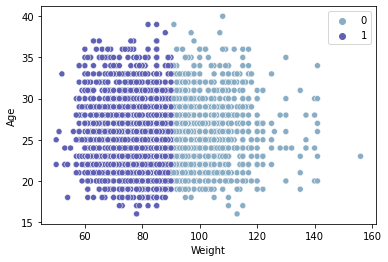

In [76]:
grouped(basketball, 'Weight', 'Age', 2)

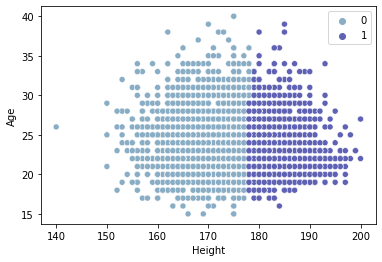

In [80]:
football = df[df['Sport'] == 'Football']
grouped(football, 'Height', 'Age', 2)

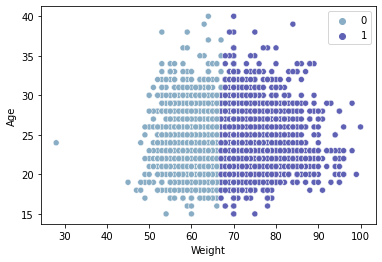

In [81]:
grouped(football, 'Weight', 'Age', 2)

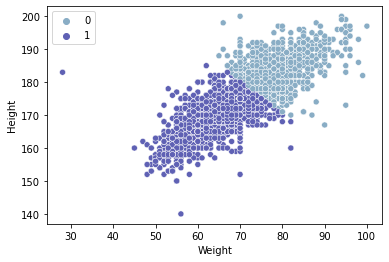

In [82]:
grouped(football, 'Weight', 'Height', 2)

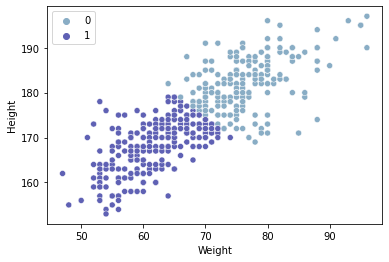

In [88]:
grouped(football[football['Year'] == 2016], 'Weight', 'Height', 2)

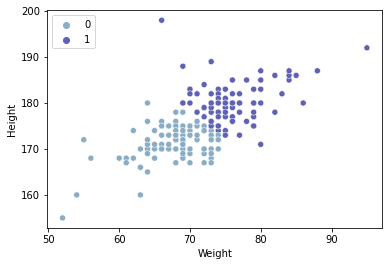

In [100]:
grouped(football[football['Year'] == 1976], 'Weight', 'Height', 2)

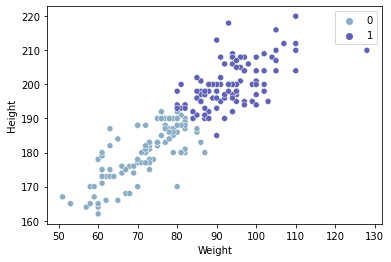

In [101]:
grouped(basketball[basketball['Year'] == 1976], 'Weight', 'Height', 2)

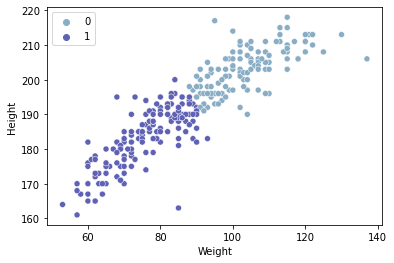

In [102]:
grouped(basketball[basketball['Year'] == 2016], 'Weight', 'Height', 2)

### Perguntas

1) Algum padrão foi descoberto? Cite algumas descobertas que chamaram atenção. Nos esportes vistos o padrão de peso e altura se manteve. Isso significa que, mesmo com os avanços no estudo do esporte, a procura pelo porte físico dos atletas ainda é bem similar, mesmo depois de 40 anos.

2) Alguma nova pergunta foi descoberta ao analisar os diferentes agrupamentos? Se sim, cite quais foram as perguntas. Queremos investigar mais a relação de escolha de físico dos atletas com o decorrer do tempo e variação do esporte. 